<a href="https://colab.research.google.com/github/gokull-lakshmanan/gokull-lakshmanan/blob/main/Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix =  pd.read_csv('netflix.csv')

**Problem Statement**

Analyze Netflix's catalog to understand what types of shows and movies are popular globally and in specific countries. Provide recommendations on how Netflix can tailor its content to attract more viewers and grow its business in different regions.


**Basic Analysis**

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8455,s8456,Movie,The Pirate Fairy,Peggy Holmes,"Mae Whitman, Christina Hendricks, Tom Hiddlest...",United States,"June 15, 2014",2014,G,78 min,Children & Family Movies,"In this spritely tale, Tinker Bell and her fri..."
2082,s2083,Movie,Maniyarayile Ashokan,Shamzu Zayba,"Jacob Gregory, S.V. Krishna Shankar, Shine Tom...",India,"August 31, 2020",2020,TV-14,110 min,"Comedies, International Movies, Romantic Movies",When his unlucky horoscope doesn’t bode well f...
292,s293,Movie,Quartet,Dustin Hoffman,"Maggie Smith, Tom Courtenay, Billy Connolly, P...",United Kingdom,"August 8, 2021",2012,PG-13,98 min,"Comedies, Dramas, Independent Movies","To save their posh retirement home, former ope..."
7761,s7762,TV Show,Power Rangers Dino Charge,NaN,"Brennan Mejia, Camille Hyde, Yoshi Sudarso, Mi...",United States,"December 2, 2015",2015,TV-Y7,1 Season,Kids' TV,"In the time of dinosaurs, the ancient and powe..."
4728,s4729,Movie,Joker,Shirish Kunder,"Akshay Kumar, Sonakshi Sinha, Shreyas Talpade,...",India,"August 2, 2018",2012,TV-PG,98 min,"Comedies, International Movies, Music & Musicals",A remote village situated neither in India or ...


**Shape of the Data Frame**

In [ ]:
netflix.shape

(8807, 12)

**Converting Type, Rating and Country Attributes from object Data Type to category**

In [ ]:
netflix['type'] = netflix['type'].astype('category')
netflix['rating'] = netflix['rating'].astype('category')
netflix['country'] = netflix['country'].astype('category')

**Statistical Summary**

In [ ]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Finding number of missing values in each column**

In [ ]:
netflix.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**Number of movies in each type**

In [ ]:
netflix['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


**Number of movies directed by each director**

In [ ]:
netflix['director'].value_counts()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


**Number of movies released in each year**

In [ ]:
netflix['release_year'].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1


**Number of movies released under each rating**

In [ ]:
netflix['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


**Move incorrect 'rating' values to the 'duration' column and Replace the incorrect 'rating' values with NaN or a default value**



In [ ]:
netflix.loc[netflix['rating'] == '66 min', 'duration'] = '66 min'
netflix.loc[netflix['rating'] == '74 min', 'duration'] = '74 min'
netflix.loc[netflix['rating'] == '84 min', 'duration'] = '84 min'

netflix.loc[netflix['rating'] == '66 min', 'rating'] = None
netflix.loc[netflix['rating'] == '74 min', 'rating'] = None
netflix.loc[netflix['rating'] == '84 min', 'rating'] = None

In [ ]:
netflix['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


**Extracting the numeric duration (in minutes) from the 'duration' column.**

In [ ]:
netflix['duration_numeric'] = np.where(netflix['type'] == 'Movie',netflix['duration'].str[:-4],netflix['duration'].str[:-7])

**Exploding the 'Country', 'Cast', and 'Listed_in' attributes.**

In [ ]:
netflix['cast'] = netflix['cast'].str.split(',')
netflix['listed_in'] = netflix['listed_in'].str.split(',')
netflix['country'] = netflix['country'].str.split(',')

In [ ]:
netflix = netflix.explode('cast')
netflix = netflix.explode('listed_in')
netflix = netflix.explode('country')

In [ ]:
netflix.shape

(186399, 13)

**Visual Analysis**

<Axes: xlabel='release_year', ylabel='Density'>

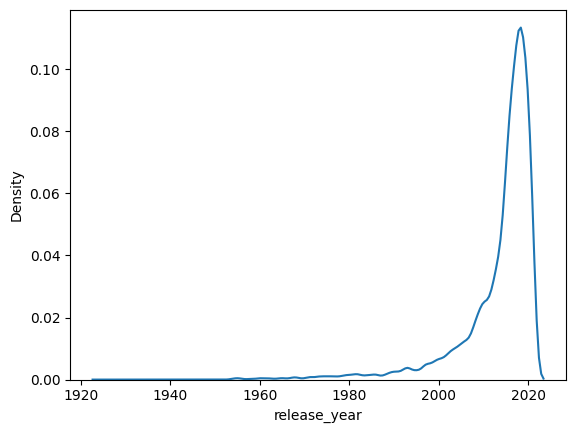

In [ ]:
sns.kdeplot(netflix['release_year'])

**Finding movies released in top 3 countries**

In [ ]:
top_3_country = netflix['country'].value_counts().head(3).index
top_3 = netflix.loc[netflix['country'].isin(top_3_country)]
top_3.shape

(75329, 13)

<Axes: xlabel='country', ylabel='Count'>

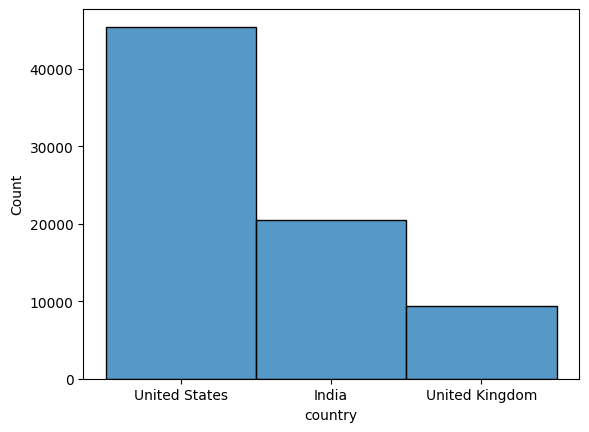

In [ ]:
sns.histplot(top_3['country'])

<Axes: xlabel='country', ylabel='count'>

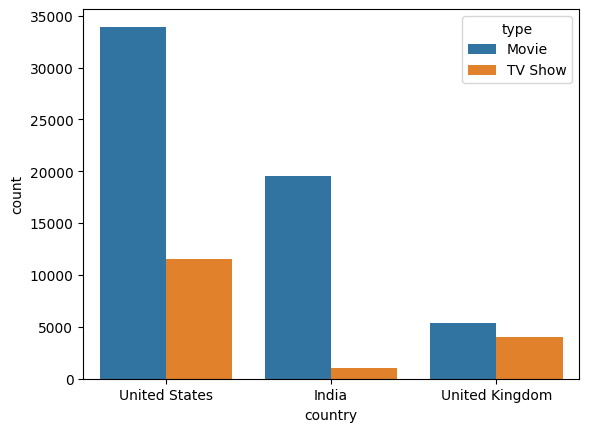

In [ ]:
sns.countplot(x = 'country', hue='type', data=top_3)

<Axes: xlabel='release_year', ylabel='Count'>

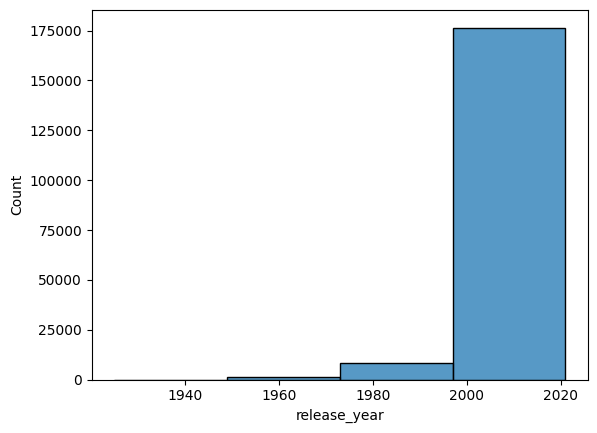

In [ ]:
sns.histplot(netflix['release_year'],bins = 4)

<Axes: xlabel='month', ylabel='count'>

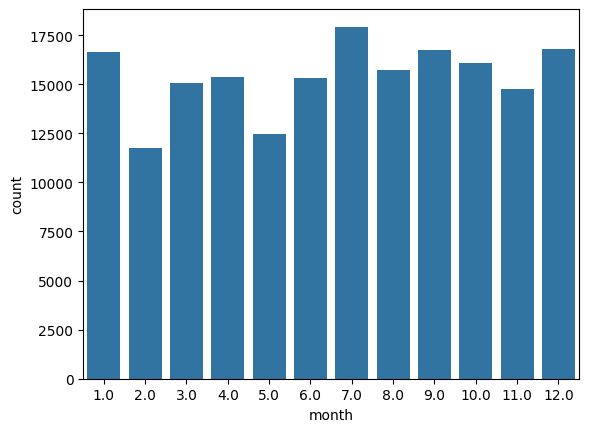

In [ ]:
netflix['month'] = pd.to_datetime(netflix['date_added'], errors='coerce').dt.month
sns.barplot(x = netflix['month'].value_counts().index,y = netflix['month'].value_counts())

**Checking For Outliers**

In [ ]:
netflix['duration_numeric'] = netflix['duration_numeric'].astype('int')
q3 = netflix['duration_numeric'].sort_values().quantile(0.75)
q1 = netflix['duration_numeric'].sort_values().quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
upper_bound,lower_bound

(275.5, -160.5)

In [ ]:
netflix.loc[(netflix['duration_numeric'] > upper_bound) & (netflix['duration_numeric'] < lower_bound)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,month


<Axes: ylabel='duration_numeric'>

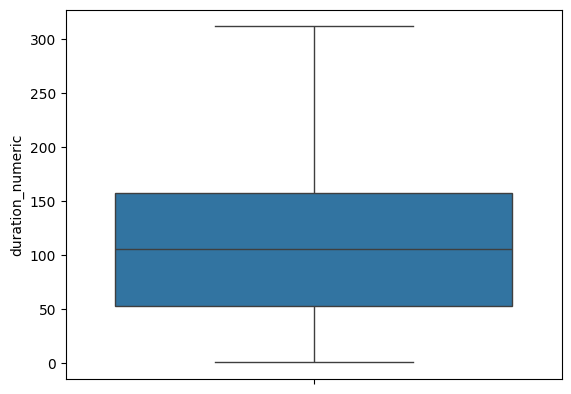

In [ ]:
sns.boxplot(netflix['duration_numeric'].value_counts().index)

In [ ]:
netflix[['duration_numeric','release_year']].corr()

,duration_numeric,release_year
duration_numeric,1.00000,-0.30851
release_year,-0.30851,1.00000


<Axes: >

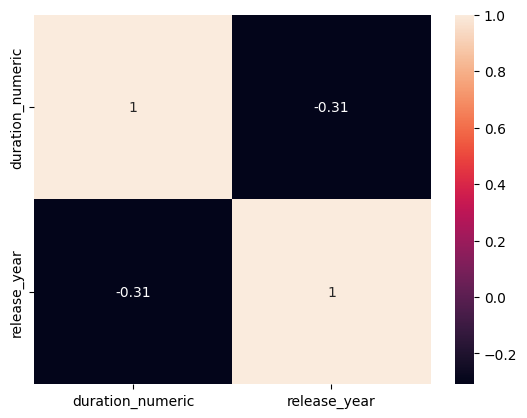

In [ ]:
sns.heatmap(netflix[['duration_numeric','release_year']].corr(),annot=True)

**Overview of the range of attributes**

In [ ]:
netflix.describe()

,release_year,duration_numeric,month
count,186399.000000,186399.000000,184662.000000
mean,2013.422792,76.677831,6.649868
std,9.048670,52.294745,3.449333
min,1925.000000,1.000000,1.000000
25%,2012.000000,3.000000,4.000000
50%,2016.000000,95.000000,7.000000
75%,2019.000000,112.000000,10.000000
max,2021.000000,312.000000,12.000000


**Movies acted in by each actor in top 3 countries**

In [ ]:
top_3['cast'].value_counts()

,count
cast,
Anupam Kher,105
Shah Rukh Khan,73
Om Puri,69
Boman Irani,68
Akshay Kumar,67
...,...
Jocelyn Osorio,1
Eddie J. Fernandez,1
David Fernandez Jr.,1


In [ ]:
top_3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
4,s5,TV Show,Kota Factory,NaN,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2
4,s5,TV Show,Kota Factory,NaN,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,Romantic TV Shows,In a city of coaching centers known to train I...,2
4,s5,TV Show,Kota Factory,NaN,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,TV Comedies,In a city of coaching centers known to train I...,2
4,s5,TV Show,Kota Factory,NaN,Jitendra Kumar,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2


**Movies released per month in the top 3 countries.**

<Axes: xlabel='month', ylabel='count'>

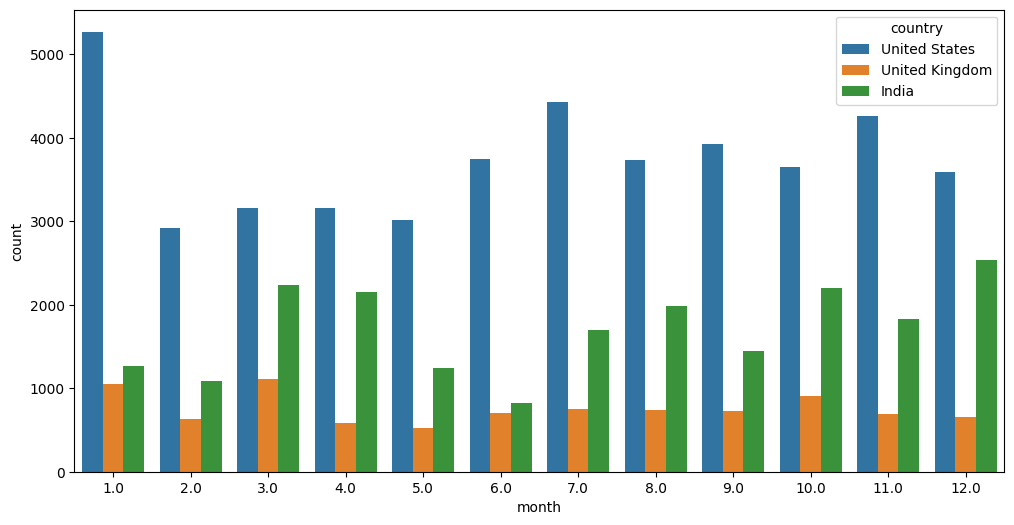

In [ ]:
top_3['date_added'] = pd.to_datetime(top_3['date_added'], errors='coerce')
top_3['month'] = top_3['date_added'].dt.month
plt.figure(figsize=(12,6))
sns.countplot(x = 'month',data = top_3,hue='country')

In [ ]:
us = top_3.loc[top_3['country'] == 'United States']['director'].value_counts().head(3)
ind = top_3.loc[top_3['country'] == 'India']['director'].value_counts().head(3)
uk = top_3.loc[top_3['country'] == 'United Kingdom']['director'].value_counts().head(3)

**Top 3 directors based on movies from the top 3 countries.**

**1. United States**

<Axes: xlabel='director', ylabel='count'>

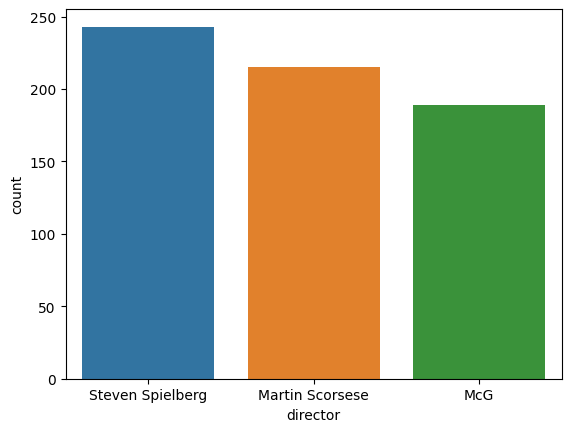

In [ ]:
sns.barplot(x=us.index, y=us , hue = us.index)

**2. India**

<Axes: xlabel='director', ylabel='count'>

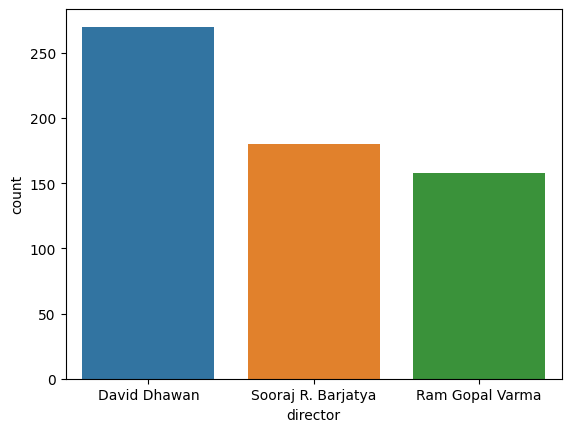

In [ ]:
sns.barplot(x=ind.index, y=ind , hue = ind.index)

**3. United Kindom**

<Axes: xlabel='director', ylabel='count'>

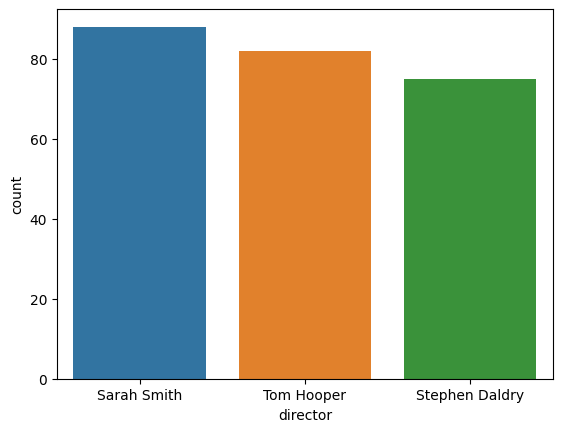

In [ ]:
sns.barplot(x=uk.index, y=uk , hue = uk.index)

In [ ]:
us_cast = top_3.loc[top_3['country'] == 'United States']['cast'].value_counts().head(3)
ind_cast = top_3.loc[top_3['country'] == 'India']['cast'].value_counts().head(3)
uk_cast = top_3.loc[top_3['country'] == 'United Kingdom']['cast'].value_counts().head(3)

**Top 3 actors based on movies from the top 3 countries.**

<Axes: xlabel='cast', ylabel='count'>

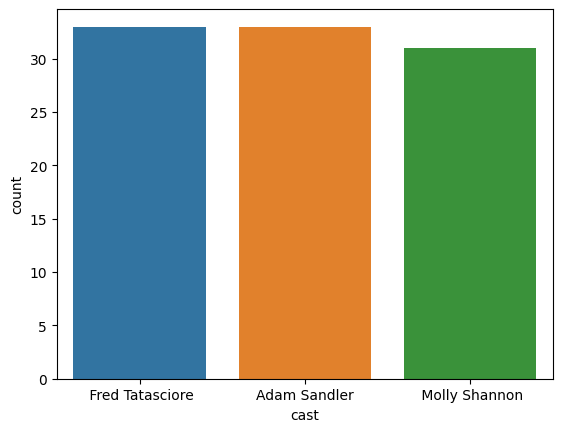

In [ ]:
sns.barplot(x=us_cast.index, y=us_cast , hue = us_cast.index)

<Axes: xlabel='cast', ylabel='count'>

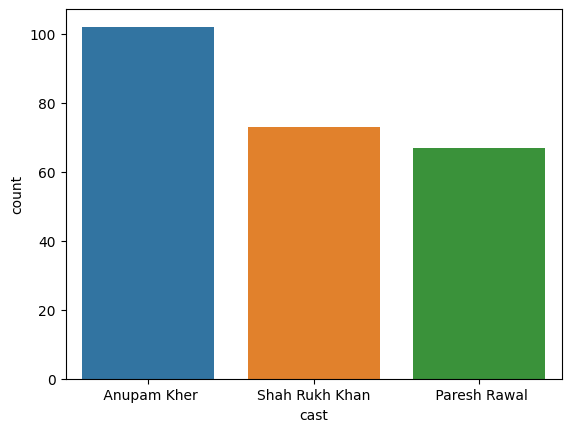

In [ ]:
sns.barplot(x=ind_cast.index, y=ind_cast , hue = ind_cast.index)

<Axes: xlabel='cast', ylabel='count'>

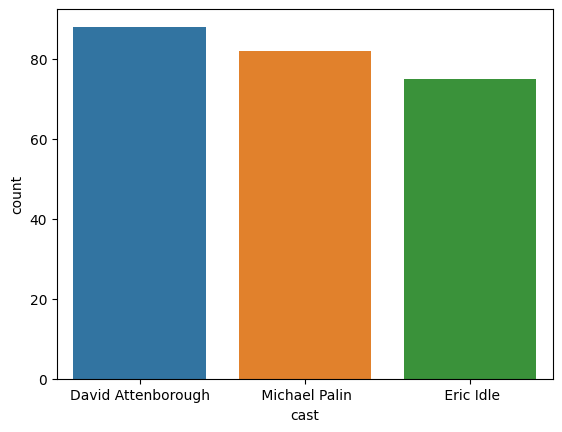

In [ ]:
sns.barplot(x=uk_cast.index, y=uk , hue = uk_cast.index)

In [ ]:
us_rating = top_3.loc[top_3['country'] == 'United States']['rating'].value_counts().head(3)
ind_rating = top_3.loc[top_3['country'] == 'India']['rating'].value_counts().head(3)
uk_rating = top_3.loc[top_3['country'] == 'United Kingdom']['rating'].value_counts().head(3)

**Top 3 rating based on movies from the top 3 countries.**

In [ ]:
us_rating

,count
rating,
TV-MA,11648
R,9933
PG-13,7250


In [ ]:
ind_rating

,count
rating,
TV-14,11711
TV-MA,5209
TV-PG,2991


In [ ]:
uk_rating

,count
rating,
TV-MA,3727
R,1898
PG-13,1037


**Trend Analysis**

<ipython-input-118-1401a4d2a86a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_type = top_3.groupby(['release_year','type'],as_index = False).size()


<Axes: xlabel='release_year', ylabel='size'>

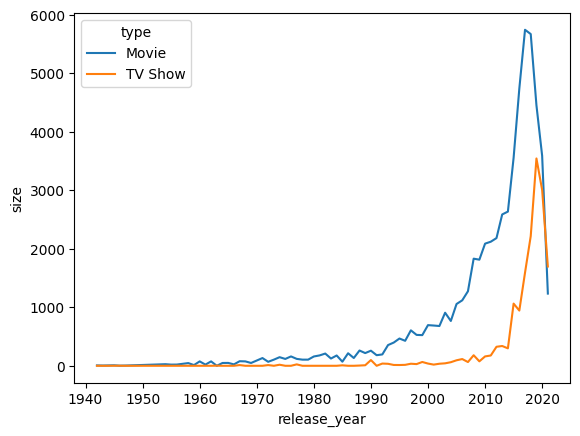

In [ ]:
trend_type = top_3.groupby(['release_year','type'],as_index = False).size()
sns.lineplot(x = 'release_year',y = 'size',hue = 'type',data = trend_type)

<Axes: xlabel='release_year', ylabel='size'>

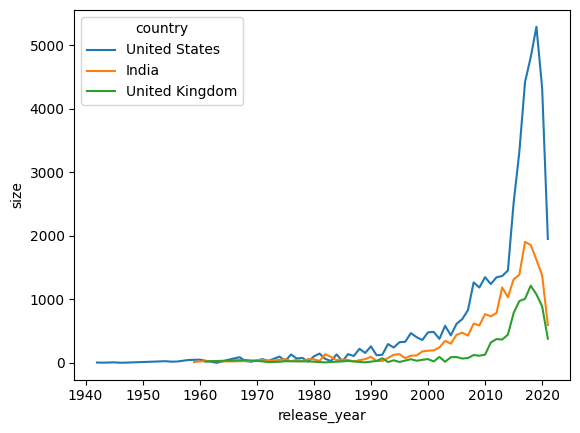

In [ ]:
trend_country = top_3.groupby(['release_year','country'],as_index = False).size()
sns.lineplot(x = 'release_year',y = 'size',hue = 'country',data = trend_country)

<Axes: xlabel='release_year', ylabel='duration_numeric'>

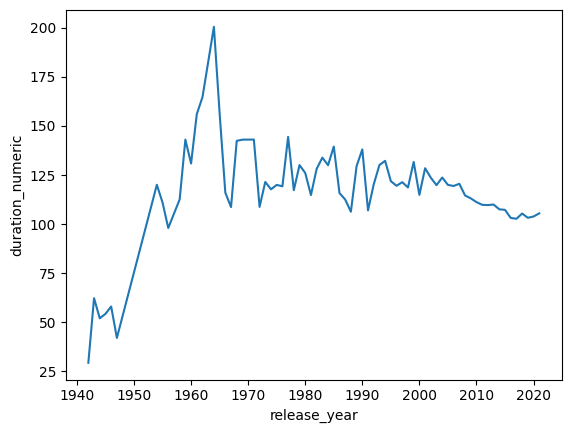

In [ ]:
top_3['duration_numeric']  = top_3['duration_numeric'].astype('int')
duration_trend = top_3[top_3['type'] == 'Movie'].groupby('release_year')['duration_numeric'].mean()
sns.lineplot(x = duration_trend.index,y = duration_trend)

<Axes: xlabel='release_year', ylabel='duration_numeric'>

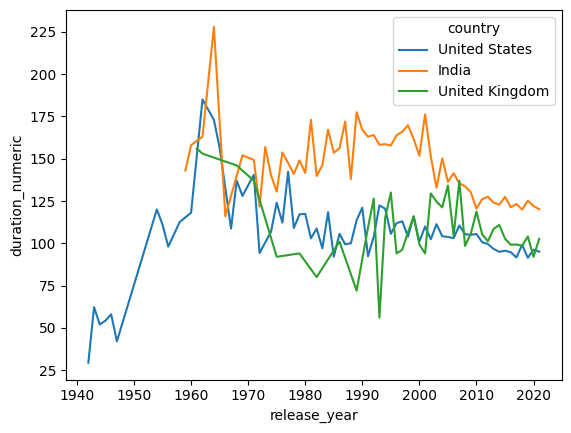

In [ ]:
duration_trend_country_wise = top_3[top_3['type'] == 'Movie'].groupby(['release_year','country'],as_index = False)['duration_numeric'].mean()
sns.lineplot(x = 'release_year',y = 'duration_numeric', data =  duration_trend_country_wise, hue = 'country')

**Recommendations Based on Analysis**

1. **Top 3 Countries by Movie Releases:**  
   The top 3 countries where most movies are released are the United States, India, and the United Kingdom. We can leverage the popularity of shows from these regions to broadcast on Netflix, as they are more likely to be watched by audiences from these countries.

2. **Movies vs. TV Shows:**  
   In all three countries, movies are released more frequently than TV shows, so we should focus on broadcasting movies rather than TV shows.

3. **Release Timing:**  
   - In the **United States**, most movies are added to Netflix in the 1st month, so we can consider releasing more shows at this time.
   - In **India**, the 12th month sees the most movie releases.
   - In the **United Kingdom**, the 3rd month is the peak period for movie releases.

4. **Directors with Popular Movies:**  
   - In the **United States**, movies directed by Steven Spielberg, Martin Scorsese, and McG are released more frequently.
   - In **India**, movies directed by David Dhawan, Sooraj R. Barjatya, and Ram Gopal Varma are released more often.
   - In the **United Kingdom**, films directed by Sharon Smith, Tom Hooper, and Stephen Daldry have higher release rates.
   
   Therefore, we should prioritize broadcasting movies directed by these filmmakers.

5. **Actors in Popular Movies:**  
   - In the **United States**, movies featuring Fred Tatasciore, Adam Sandler, and Molly Shannon are more frequent.
   - In **India**, films featuring Anupam Kher, Shah Rukh Khan, and Paresh Rawal are released more often.
   - In the **United Kingdom**, movies featuring David Attenborough, Michael Palin, and Eric Idle have higher release frequencies.
   
   We should prioritize movies featuring these actors.

6. **Movie Ratings:**  
   - In the **United States**, the most common movie ratings are **TV-MA**, **R**, and **PG-13**.
   - In **India**, the most popular ratings are **TV-14**, **TV-MA**, and **TV-PG**.
   - In the **United Kingdom**, the common ratings are **TV-MA**, **R**, and **PG-13**.
   
   We should focus on releasing movies with these ratings.

7. **Duration of Movies and Shows:**  
   In recent years, the duration of movies and shows in all three countries has been decreasing due to the reduced attention span of audiences. To cater to this shift, we should focus on broadcasting shows with shorter durations.

---